In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv(Path('Monarch_Watch_2018.csv'))
df.head()

,Tag,Date,City,State,ZipCode,Country,Latitude,Longitude,First Name,Notes
0,MPT293,11/26/2018,Mount Pleasant,SC,29464,USA,32.847273,-79.820563,William,NaN
1,RJL275,9/3/2018,Lancaster,PA,17602,USA,40.048755,-76.315491,Caitlin,In our garden
2,RJL307,10/1/2018,LANCASTER,PA,17601,USA,40.076553,-76.310680,Pamela,nectaring with 5 others on butterfly bush
3,SGT699,10/5/2018,Manchester,VT,5254,USA,43.163690,-73.072330,Tara,Monarch was at the equinox nursery
4,SNC614,11/17/2018,Folly Beach,SC,29439,USA,32.663043,-79.926970,NaN,Pelican Watch pavilion @ County Park


In [3]:
# adding a column for year
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Tag,Date,City,State,ZipCode,Country,Latitude,Longitude,First Name,Notes,year
0,MPT293,11/26/2018,Mount Pleasant,SC,29464,USA,32.847273,-79.820563,William,NaN,2018
1,RJL275,9/3/2018,Lancaster,PA,17602,USA,40.048755,-76.315491,Caitlin,In our garden,2018
2,RJL307,10/1/2018,LANCASTER,PA,17601,USA,40.076553,-76.310680,Pamela,nectaring with 5 others on butterfly bush,2018
3,SGT699,10/5/2018,Manchester,VT,5254,USA,43.163690,-73.072330,Tara,Monarch was at the equinox nursery,2018
4,SNC614,11/17/2018,Folly Beach,SC,29439,USA,32.663043,-79.926970,NaN,Pelican Watch pavilion @ County Park,2018


In [4]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Tag,Date,City,State,ZipCode,Country,Latitude,Longitude,First Name,Notes,year,month
0,MPT293,11/26/2018,Mount Pleasant,SC,29464,USA,32.847273,-79.820563,William,NaN,2018,11
1,RJL275,9/3/2018,Lancaster,PA,17602,USA,40.048755,-76.315491,Caitlin,In our garden,2018,9
2,RJL307,10/1/2018,LANCASTER,PA,17601,USA,40.076553,-76.310680,Pamela,nectaring with 5 others on butterfly bush,2018,10
3,SGT699,10/5/2018,Manchester,VT,5254,USA,43.163690,-73.072330,Tara,Monarch was at the equinox nursery,2018,10
4,SNC614,11/17/2018,Folly Beach,SC,29439,USA,32.663043,-79.926970,NaN,Pelican Watch pavilion @ County Park,2018,11


In [5]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["month"]).count()
counts = counts.reset_index()
counts

,month,Tag,Date,City,State,ZipCode,Country,Latitude,Longitude,First Name,Notes,year
0,1,5,5,5,5,5,5,5,5,5,4,5
1,2,3,3,3,3,3,3,3,3,3,3,3
2,3,6,6,6,6,6,6,6,6,5,6,6
3,8,171,171,171,171,170,171,171,171,170,139,171
4,9,584,584,584,584,584,584,584,584,567,431,584
5,10,367,367,367,367,367,367,367,367,351,286,367
6,11,57,57,57,57,56,57,57,57,53,48,57
7,12,13,13,13,13,13,13,13,13,12,9,13


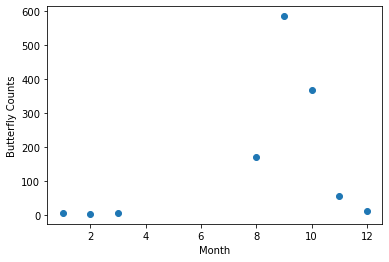

In [6]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
plt.scatter(counts.month, counts.Date)
plt.xlabel('Month')
plt.ylabel('Butterfly Counts')
plt.show()

In [7]:
# using reshape
X = counts.month.values.reshape(-1, 1)

In [8]:
# setting the y axis as the count of dates
y = counts.Date

In [9]:
# setting the model
model = LinearRegression()

In [10]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [11]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(8,)


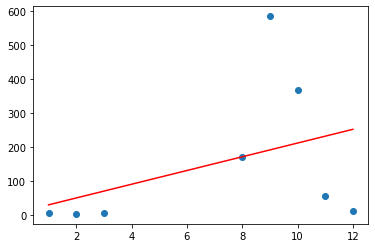

In [12]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (8, 3)


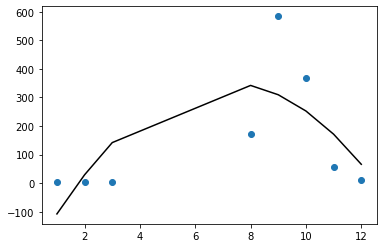

In [14]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (8, 4)


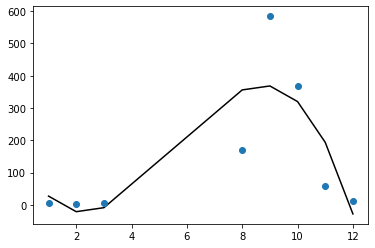

In [15]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (8, 5)


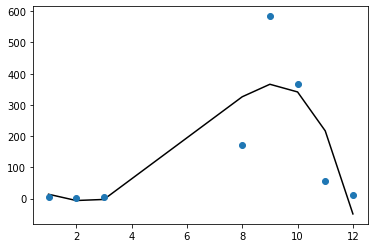

In [16]:
# 4th degree
fit_and_plot_poly_deg(4)